In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
#importing datasets
cereal = pd.read_csv('C:\\Users\\AADITYA\\Documents\\datasets\\cereal.csv')

In [44]:
#preview of the dataset
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,is_highly_rated
0,100% Bran,N,cold,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,0
1,100% Natural Bran,Q,cold,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,0
2,All-Bran,K,cold,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,0
3,All-Bran with Extra Fiber,K,cold,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,1
4,Almond Delight,R,cold,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,0


In [45]:
#dimensions of the dataset
cereal.shape

(77, 17)

In [47]:
#data types of the attributes in the dataset
cereal.dtypes

name                object
mfr                 object
type                object
calories             int64
protein              int64
fat                  int64
sodium               int64
fiber              float64
carbo              float64
sugars               int64
potass               int64
vitamins             int64
shelf                int64
weight             float64
cups               float64
rating             float64
is_highly_rated      int32
dtype: object

In [48]:
#find na values
cereal.isna().sum()

name               0
mfr                0
type               0
calories           0
protein            0
fat                0
sodium             0
fiber              0
carbo              0
sugars             0
potass             0
vitamins           0
shelf              0
weight             0
cups               0
rating             0
is_highly_rated    0
dtype: int64

In [50]:
#unique names of cereals
names = cereal['name'].unique()
print(names,"\n")
print("There are ",len(names)," number of cereals")

['100% Bran' '100% Natural Bran' 'All-Bran' 'All-Bran with Extra Fiber'
 'Almond Delight' 'Apple Cinnamon Cheerios' 'Apple Jacks' 'Basic 4'
 'Bran Chex' 'Bran Flakes' "Cap'n'Crunch" 'Cheerios'
 'Cinnamon Toast Crunch' 'Clusters' 'Cocoa Puffs' 'Corn Chex'
 'Corn Flakes' 'Corn Pops' 'Count Chocula' "Cracklin' Oat Bran"
 'Cream of Wheat (Quick)' 'Crispix' 'Crispy Wheat & Raisins' 'Double Chex'
 'Froot Loops' 'Frosted Flakes' 'Frosted Mini-Wheats'
 'Fruit & Fibre Dates; Walnuts; and Oats' 'Fruitful Bran' 'Fruity Pebbles'
 'Golden Crisp' 'Golden Grahams' 'Grape Nuts Flakes' 'Grape-Nuts'
 'Great Grains Pecan' 'Honey Graham Ohs' 'Honey Nut Cheerios' 'Honey-comb'
 'Just Right Crunchy  Nuggets' 'Just Right Fruit & Nut' 'Kix' 'Life'
 'Lucky Charms' 'Maypo' 'Muesli Raisins; Dates; & Almonds'
 'Muesli Raisins; Peaches; & Pecans' 'Mueslix Crispy Blend'
 'Multi-Grain Cheerios' 'Nut&Honey Crunch' 'Nutri-Grain Almond-Raisin'
 'Nutri-grain Wheat' 'Oatmeal Raisin Crisp' 'Post Nat. Raisin Bran'
 'Product

In [51]:
#replacing type of cereal with its full form
cereal['type'] = cereal['type'].str.replace('C','cold')
cereal['type'] = cereal['type'].str.replace('H','hot')

In [52]:
cereal['mfr'].head()

0    N
1    Q
2    K
3    K
4    R
Name: mfr, dtype: object

In [10]:
cereal['type'].value_counts()

cold    74
hot      3
Name: type, dtype: int64

In [11]:
cereal['shelf'].value_counts()

3    36
2    21
1    20
Name: shelf, dtype: int64

In [12]:
cereal['cups'].value_counts()

1.00    30
0.75    16
0.67    13
0.50     7
0.33     3
0.88     2
1.50     1
1.33     1
1.13     1
0.80     1
0.25     1
1.25     1
Name: cups, dtype: int64

In [13]:
#means of all nutrients in cereals of all manufacturers
cereal_nutrients_agg = cereal.groupby('mfr').agg(
{
    'calories':'mean',
    'protein':'mean',
    'fat':'mean',
    'sodium':'mean',
    'fiber':'mean',
    'carbo':'mean',
    'sugars':'mean',
    'potass':'mean',
    'sodium':'mean',
    'vitamins':'mean'
}
)

In [14]:
cereal_nutrients_agg.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
mfr,,,,,,,,,
A,100.000000,4.000000,1.000000,0.000000,0.000000,16.000000,3.000000,95.000000,25.000000
G,111.363636,2.318182,1.363636,200.454545,1.272727,14.727273,7.954545,85.227273,35.227273
K,108.695652,2.652174,0.608696,174.782609,2.739130,15.130435,7.565217,103.043478,34.782609
N,86.666667,2.833333,0.166667,37.500000,4.000000,16.000000,1.833333,120.666667,8.333333
P,108.888889,2.444444,0.888889,146.111111,2.777778,13.222222,8.777778,113.888889,25.000000


In [15]:
#converting to dataframe
cereal_nutrients_agg = cereal_nutrients_agg.reset_index()

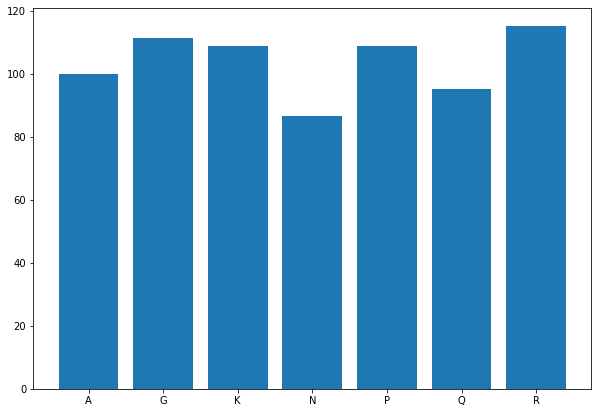

In [16]:
#barchart of calories

# Figure Size
fig = plt.figure(figsize =(10, 7))

# Horizontal Bar Plot
plt.bar(cereal_nutrients_agg['mfr'], cereal_nutrients_agg['calories'])
 
# Show Plot
plt.show()

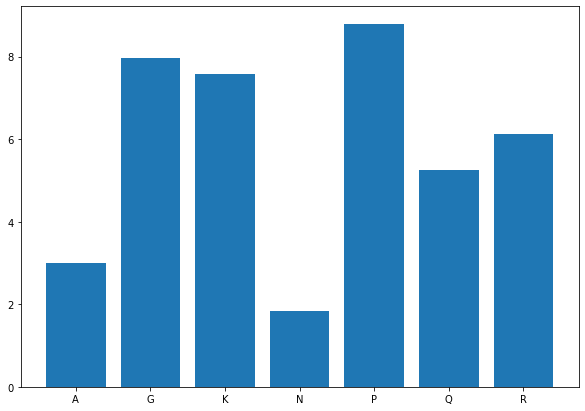

In [60]:
#barchart of calories

# Figure Size
fig = plt.figure(figsize =(10, 7))

# Horizontal Bar Plot
plt.bar(cereal_nutrients_agg['mfr'], cereal_nutrients_agg['sugars'])
 
# Show Plot
plt.show()

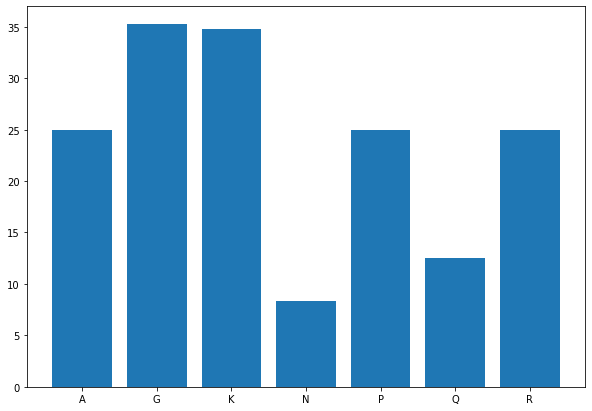

In [62]:
#barchart of fiber

# Figure Size
fig = plt.figure(figsize =(10, 7))

# Horizontal Bar Plot
plt.bar(cereal_nutrients_agg['mfr'], cereal_nutrients_agg['vitamins'])
 
# Show Plot
plt.show()

In [19]:
cereal_type = cereal['type'].value_counts()

In [20]:
cereal_type = cereal_type.reset_index()

In [21]:
type(cereal_type)

pandas.core.frame.DataFrame

In [22]:
cereal_type

,index,type
0,cold,74
1,hot,3


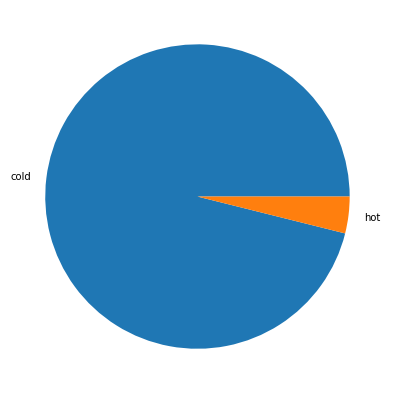

In [23]:
# Creating pie plot
fig = plt.figure(figsize =(10, 7))
plt.pie(cereal_type['type'], labels = cereal_type['index'])
  
# show plot
plt.show()

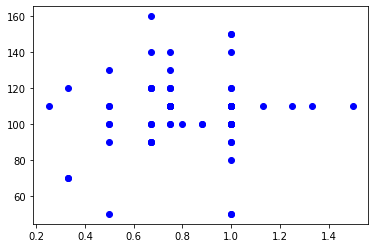

In [24]:
#is there a relation between number of cups per servings and calories?
#scatter plot between number of servings and calories
plt.scatter(cereal['cups'], cereal['calories'], c ="blue")
  
# To show the plot
plt.show()

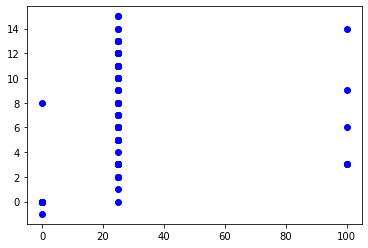

In [25]:
#is there a relation between vitamins and sugars?
#scatter plot between number of servings and calories
plt.scatter(cereal['vitamins'], cereal['sugars'], c ="blue")
  
# To show the plot
plt.show()

In [26]:
#generating boolean columns
cereal['is_highly_rated'] = (cereal['rating'] >= 80)

In [27]:
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,is_highly_rated
0,100% Bran,N,cold,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,False
1,100% Natural Bran,Q,cold,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,False
2,All-Bran,K,cold,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,False
3,All-Bran with Extra Fiber,K,cold,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,True
4,Almond Delight,R,cold,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,False


In [28]:
#converting true false to 0/1
cereal['is_highly_rated'] = cereal['is_highly_rated'].astype(int)

In [29]:
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,is_highly_rated
0,100% Bran,N,cold,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,0
1,100% Natural Bran,Q,cold,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,0
2,All-Bran,K,cold,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,0
3,All-Bran with Extra Fiber,K,cold,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,1
4,Almond Delight,R,cold,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,0


In [56]:
#mutiple linear regression model to predict a cereal's rating
x = cereal[['sugars','calories','cups','weight','fat','sodium']]
y = cereal['rating']

In [57]:
x, y = np.array(x), np.array(y)

In [58]:
model = LinearRegression().fit(x, y)

In [59]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8623790831022287
